# Project 1 Data Story

### Summary:

This is the continuous work after the data set is cleansed, wrangled and some fields were computed and added. In the previous data cleansing and wrangling notebook, I queried dataframe to get the records for the games occurred between righties and lefties. From 2000 to 2019, there are total 10066 matches played between lefties and righties. The data has been written to the data file RL_h,csv. Further, the RL_h data has been normalized to total 20132 rows and the data has been written to RL_v.csv.
The purpose is to explore the data for the question: does left hand player have advantage against right hand player?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import seed
import seaborn as sns
from os import listdir
import re
from scipy import stats

In [2]:
# some functions may use later
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y 

In [3]:
def add_value_labels(ax, spacing=5):

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        va = 'bottom'

        if y_value < 0:
            space *= -1
            # Vertical alignment
            va = 'top'

        label = "{:}".format(y_value)  # Use :.1f if wanting decimals.

        # Create annotation
        ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va=va) 

### Import data from data files created by Data Clean and wrange process

In [4]:
df = pd.read_csv('data/RL_v.csv')
df2 = pd.read_csv('data/RL_h.csv')
df_all = pd.read_csv('data/all_v_00_19.csv')

In [5]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90602 entries, 0 to 90601
Data columns (total 41 columns):
Unnamed: 0            90602 non-null int64
tourney_id            90602 non-null object
tourney_name          90602 non-null object
surface               90602 non-null object
tourney_level         90602 non-null object
tourney_date          90602 non-null int64
match_num             90602 non-null int64
player_id             90602 non-null int64
player_name           90602 non-null object
player_hand           90602 non-null object
player_ht             90602 non-null float64
player_ioc            90602 non-null object
player_age            90602 non-null float64
score                 90602 non-null object
best_of               90602 non-null int64
round                 90602 non-null object
minutes               90602 non-null float64
ace                   90602 non-null float64
df                    90602 non-null float64
svpt                  90602 non-null float64
sv1stIn   

In [6]:
df[(df.player_id==104745) & (df.year==2018)].head()

,Unnamed: 0,tourney_id,tourney_name,surface,tourney_level,tourney_date,match_num,player_id,player_name,player_hand,...,sv2ndIn_pct,sv1stWon_pct,sv2ndWon_pct,GmsWon,GmsLoss,year,opponent_id,opponent_name,won_flag,player_age_bucket
9582,139,2018-580,Australian Open,Hard,G,20180115,101,104745,Rafael Nadal,L,...,0.27,0.56,0.18,18.0,3.0,2018,103607,Victor Estrella,1,30-34
9588,203,2018-580,Australian Open,Hard,G,20180115,201,104745,Rafael Nadal,L,...,0.27,0.59,0.16,18.0,13.0,2018,104919,Leonardo Mayer,1,30-34
9591,235,2018-580,Australian Open,Hard,G,20180115,301,104745,Rafael Nadal,L,...,0.35,0.43,0.24,18.0,5.0,2018,106000,Damir Dzumhur,1,30-34
9595,251,2018-580,Australian Open,Hard,G,20180115,401,104745,Rafael Nadal,L,...,0.32,0.43,0.19,24.0,15.0,2018,106043,Diego Sebastian Schwartzman,1,30-34
9671,1081,2018-0410,Monte Carlo Masters,Clay,M,20180416,285,104745,Rafael Nadal,L,...,0.33,0.50,0.23,12.0,4.0,2018,105379,Aljaz Bedene,1,30-34


In [7]:
df['bpLoss']=df.bpFaced - df.bpSaved

### From 2000 to 2019, there are total 10066 matches played between lefities and righties.  The below chart shows how it breaks down by the different levels.

Total matches between righties and lefties by tourney level


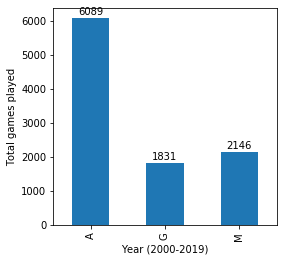

In [8]:
print('Total matches between righties and lefties by tourney level')

plt.figure(figsize=(4,4))
tourney_plot=df2.groupby('tourney_level').tourney_id.count().plot(kind='bar')
plt.xlabel('Year (2000-2019)')
plt.ylabel('Total games played')
add_value_labels(tourney_plot, 1)
plt.show()

In [9]:
Total_players = len(df['player_id'].drop_duplicates())
Total_players_R = len(df[df.player_hand=='R'].player_id.drop_duplicates())
Total_players_L = len(df[df.player_hand=='L'].player_id.drop_duplicates())
ratio_of_L = np.around(Total_players_L / Total_players, 2)
print('Total '+str(Total_players) +' players played games between righties and lefties')
print(str(Total_players_R) +' are righties and '+ str(Total_players_L) + ' are lefties')
print('The ratio of lefties of players of this data set is ' + str(ratio_of_L))

Total 625 players played games between righties and lefties
519 are righties and 106 are lefties
The ratio of lefties of players of this data set is 0.17


Total matches played yearly for sampled data for righties and lefties analysis


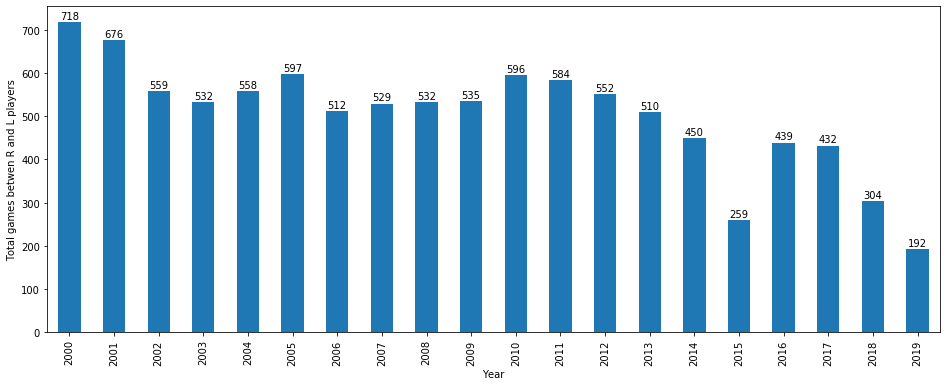

In [10]:
print('Total matches played yearly for sampled data for righties and lefties analysis')

plt.figure(figsize=(16,6))
game_plot=df2.groupby('year').tourney_id.count().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Total games betwen R and L players')
add_value_labels(game_plot, 1)
plt.show()

## Exam players data

Righties and lefties played in each year


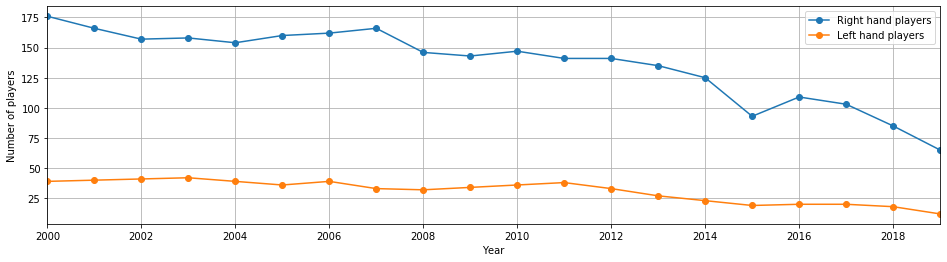

In [11]:
# get player count for eacha year
righties_n_lefties_by_year = df[['year', 'player_id', 'player_hand']].drop_duplicates()

print('Righties and lefties played in each year')
plt.figure(figsize=(16,4))

player_plot1=righties_n_lefties_by_year[righties_n_lefties_by_year.player_hand=='R'].groupby('year').player_id.count().plot(kind='line', 
                                                                    grid=True, label='Right hand players',marker='o')
player_plot1=righties_n_lefties_by_year[righties_n_lefties_by_year.player_hand=='L'].groupby('year').player_id.count().plot(kind='line', 
                                                                    grid=True, label='Left hand players',marker='o')
plt.xticks(range(2000, 2020,2))
plt.xlabel('Year')
plt.ylabel('Number of players')
h1, l1 = player_plot1.get_legend_handles_labels()
plt.legend(h1, l1, loc=1)
plt.show()

### Player height observation: average height of lefties are taller than the righties played in the same year except year 2003, 2008 and 2009.   

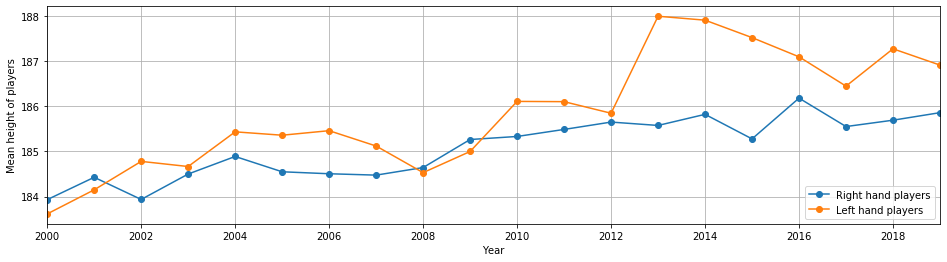

In [12]:
# get player height for eacha year
height_by_year = df[['year', 'player_id', 'player_ht', 'player_hand']].drop_duplicates()

plt.figure(figsize=(16,4))

height_plot1=height_by_year[height_by_year.player_hand=='R'].groupby('year').player_ht.mean().plot(kind='line', 
                                                                      grid=True, label='Right hand players',marker='o')
height_plot2=height_by_year[height_by_year.player_hand=='L'].groupby('year').player_ht.mean().plot(kind='line', 
                                                                      grid=True, label='Left hand players',marker='o')
plt.xticks(range(2000, 2020,2))
plt.xlabel('Year')
plt.ylabel('Mean height of players')
h1, l1 = height_plot1.get_legend_handles_labels()
plt.legend(h1, l1, loc=4)
plt.show()

### Compared mean of rank of each year, the average of rank of righties is higher than lefties.  

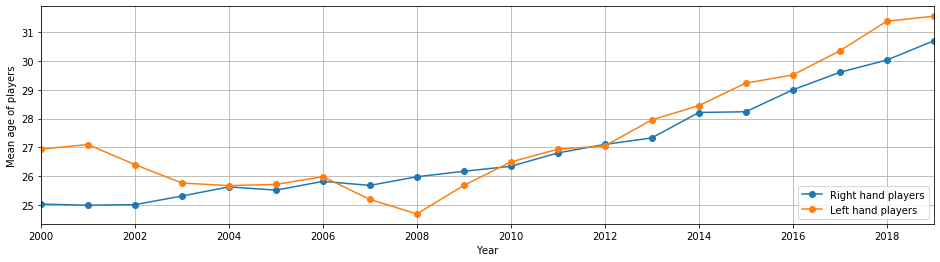

In [13]:
# get player age for eacha year
age_by_year = df[['year', 'player_id', 'player_age', 'player_hand']].drop_duplicates()

plt.figure(figsize=(16,4))

age_plot1=age_by_year[age_by_year.player_hand=='R'].groupby('year').player_age.mean().plot(kind='line', 
                                                            grid=True, label='Right hand players',marker='o')
age_plot2=age_by_year[age_by_year.player_hand=='L'].groupby('year').player_age.mean().plot(kind='line', 
                                                            grid=True, label='Left hand players',marker='o')
plt.xticks(range(2000, 2020,2))
plt.xlabel('Year')
plt.ylabel('Mean age of players')
h1, l1 = age_plot1.get_legend_handles_labels()
plt.legend(h1, l1, loc=4)
plt.show()

### Before 2004 and after 2012, the average age of lefties is older than righties.

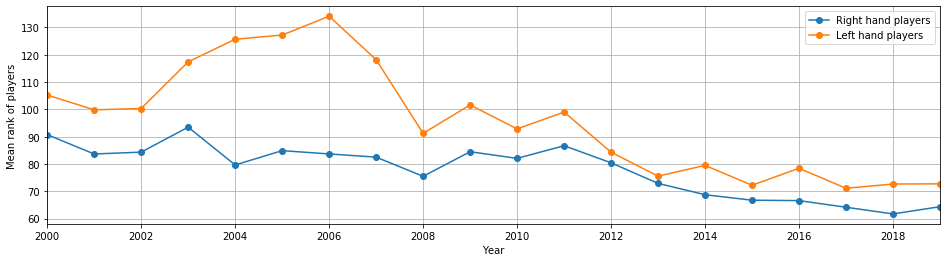

In [14]:
# get player rank for eacha year
rank_by_year = df[['year', 'player_id', 'player_rank', 'player_hand']].drop_duplicates()

plt.figure(figsize=(16,4))

rank_plot1=rank_by_year[rank_by_year.player_hand=='R'].groupby('year').player_rank.mean().plot(kind='line', 
                                                                    grid=True, label='Right hand players',marker='o')
rank_plot2=rank_by_year[rank_by_year.player_hand=='L'].groupby('year').player_rank.mean().plot(kind='line', 
                                                                    grid=True, label='Left hand players',marker='o')
plt.xticks(range(2000, 2020,2))
plt.xlabel('Year')
plt.ylabel('Mean rank of players')
h1, l1 = rank_plot1.get_legend_handles_labels()
plt.legend(h1, l1, loc=1)
plt.show()

### Plot player rank in bar chart, the mean rank of righties is higher than lefties.

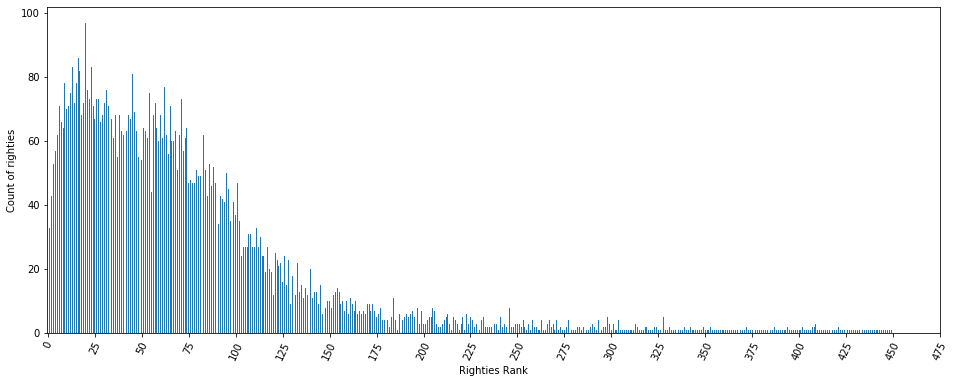

In [15]:
plt.figure(figsize=(16,6))

rank_label = np.arange(0, 500, 25)

rank_plot=rank_by_year[rank_by_year.player_hand=='R'].groupby('player_rank').player_id.count().plot(kind='bar')
plt.xlabel('Righties Rank')
plt.ylabel('Count of righties')
plt.xticks(range(0, 500, 25))
rank_plot.set_xticklabels(rank_label, rotation=65)
#plt.tick_params(
#    axis='x',          # changes apply to the x-axis
#    which='both',      # both major and minor ticks are affected
#    bottom=False,      # ticks along the bottom edge are off
#    top=False,         # ticks along the top edge are off
#    labelbottom=False) # labels along the bottom edge are off
#add_value_labels(rank_plot, 50)
plt.show()

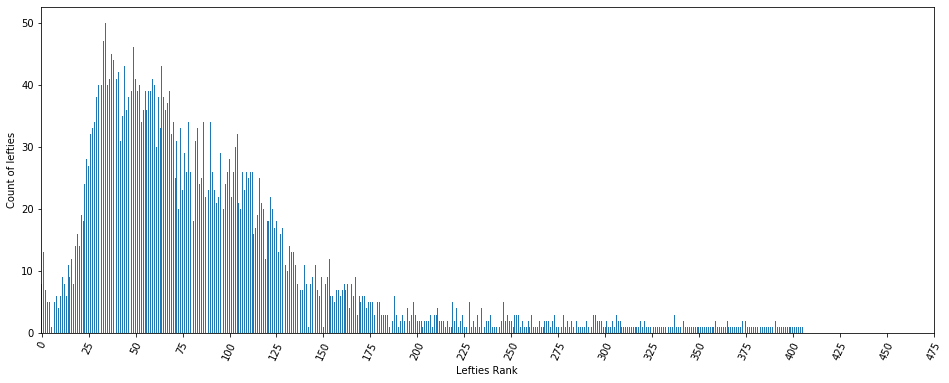

In [16]:
plt.figure(figsize=(16,6))

rank_plot=rank_by_year[rank_by_year.player_hand=='L'].groupby('player_rank').player_id.count().plot(kind='bar')
plt.xlabel('Lefties Rank')
plt.ylabel('Count of lefties')
plt.xticks(range(0, 500, 25))
rank_plot.set_xticklabels(rank_label, rotation=65)
#plt.tick_params(
#    axis='x',          # changes apply to the x-axis
#    which='both',      # both major and minor ticks are affected
#    bottom=False,      # ticks along the bottom edge are off
#    top=False,         # ticks along the top edge are off
#    labelbottom=False) # labels along the bottom edge are off
#add_value_labels(rank_plot, 50)
plt.show()

### Plot palyer rank in boxplot also shows that the righties have higher ranking than lefties at 25%, 50%, 75% quantile

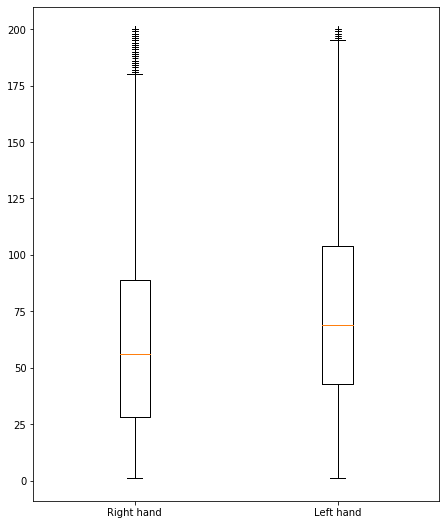

In [17]:
## combine these different collections into a list  
data1 = rank_by_year[(rank_by_year.player_rank<=200) & (rank_by_year.player_hand=='R')].player_rank
data2 = rank_by_year[(rank_by_year.player_rank<=200) & (rank_by_year.player_hand=='L')].player_rank
data_to_plot = [data1, data2]

xticklables = ['Right hand', 'Left hand']

# Create a figure instance
fig = plt.figure(1, figsize=(16, 20))

# Create an axes instance
ax = fig.add_subplot(221)

# Create the boxplot
bp=ax.boxplot(data_to_plot , notch=False, sym='+', vert=True, whis=1.5,
        positions=None, widths=None, patch_artist=False,
        bootstrap=None, usermedians=None, conf_intervals=None)

ax.set_xticklabels(xticklables)
plt.ylim=(0, 500)

# Save the figure
#fig.savefig('fig1.png', bbox_inches='tight')

### Compared 20 year mean ace percentage for righteis and lefties, the righties had higher ace percentag than lefties

The mean ace% of righties is 0.07824557917742471
The mean ace% of lefties is 0.07222928670772485


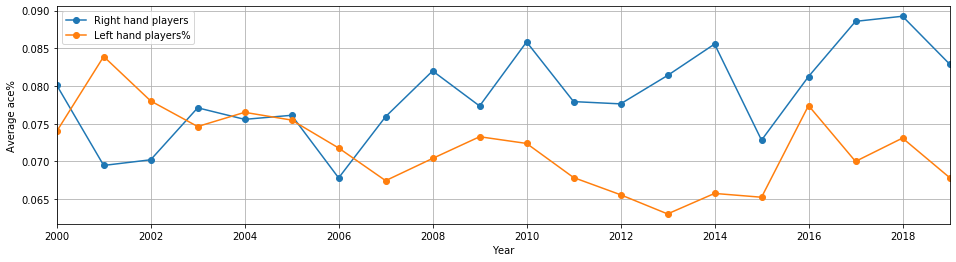

In [18]:
mean_df_r = df[df.player_hand=='R'].ace_pct.mean()
mean_df_l = df[df.player_hand=='L'].ace_pct.mean()

print('The mean ace% of righties is ' + str(mean_df_r))
print('The mean ace% of lefties is ' + str(mean_df_l))

plt.figure(figsize=(16,4))

#ace_plot=df.groupby('year').ace_pct.mean().plot(kind='line', grid=True, label='All players')
ace_plot=df[df.player_hand=='R'].groupby('year').ace_pct.mean().plot(kind='line', grid=True, label='Right hand players',marker='o')
ace_plot=df[df.player_hand=='L'].groupby('year').ace_pct.mean().plot(kind='line', grid=True, label='Left hand players%',marker='o')
plt.xticks(range(2000, 2020,2))
plt.xlabel('Year')
plt.ylabel('Average ace%')
h1, l1 = ace_plot.get_legend_handles_labels()
plt.legend(h1, l1, loc=2)
plt.show()

### Lefties has a little higher double fault percentage than righties

The mean double fault% of righties is 0.03750546393800847
The mean double fault% of lefties is 0.03961951122590822


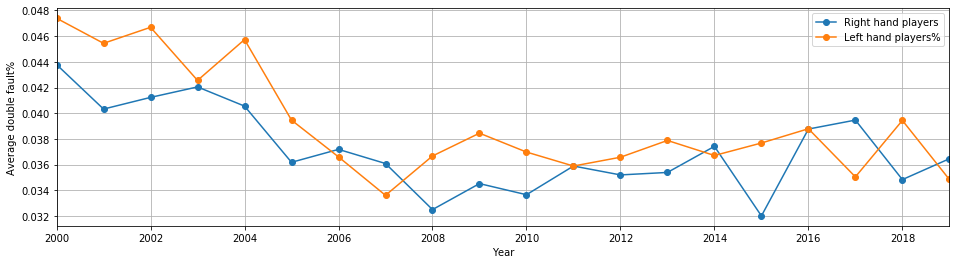

In [19]:
mean_df_r = df[df.player_hand=='R'].df_pct.mean()
mean_df_l = df[df.player_hand=='L'].df_pct.mean()

print('The mean double fault% of righties is ' + str(mean_df_r))
print('The mean double fault% of lefties is ' + str(mean_df_l))

plt.figure(figsize=(16,4))

#ace_plot=df.groupby('year').ace_pct.mean().plot(kind='line', grid=True, label='All players')
df_plot=df[df.player_hand=='R'].groupby('year').df_pct.mean().plot(kind='line', grid=True, label='Right hand players',marker='o')
df_plot=df[df.player_hand=='L'].groupby('year').df_pct.mean().plot(kind='line', grid=True, label='Left hand players%',marker='o')
plt.xticks(range(2000, 2020,2))
plt.xlabel('Year')
plt.ylabel('Average double fault%')
h1, l1 = df_plot.get_legend_handles_labels()
plt.legend(h1, l1, loc=1)
plt.show()

### Compared 20 year matches, lefties do have higher first in server percentage.

The mean serve 1st In% of righties is 0.6056288495926871
The mean serve 1st In% of lefties is 0.616906417643557


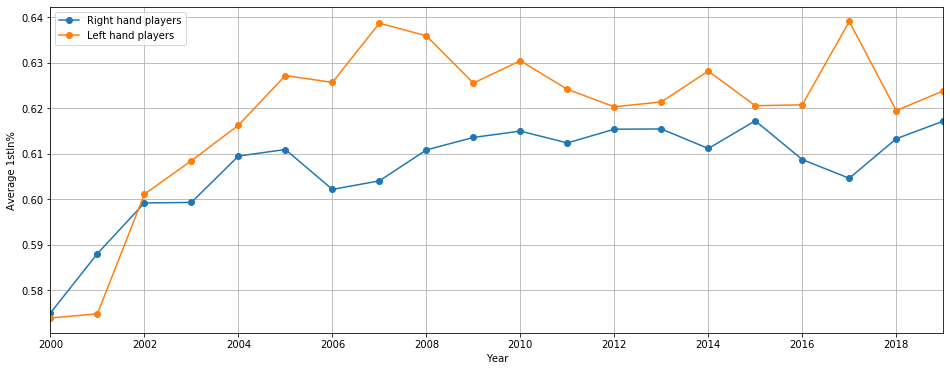

In [20]:
mean_df_r = df[df.player_hand=='R'].sv1stIn_pct.mean()
mean_df_l = df[df.player_hand=='L'].sv1stIn_pct.mean()

print('The mean serve 1st In% of righties is ' + str(mean_df_r))
print('The mean serve 1st In% of lefties is ' + str(mean_df_l))

plt.figure(figsize=(16,6))

#v1stIn_plot=df.groupby('year').sv1stIn_pct.mean().plot(kind='line', grid=True, label='All players')
v1stIn_plot=df[df.player_hand=='R'].groupby('year').sv1stIn_pct.mean().plot(kind='line', 
                                                    grid=True, label='Right hand players',marker='o')
v1stIn_plot=df[df.player_hand=='L'].groupby('year').sv1stIn_pct.mean().plot(kind='line', 
                                                    grid=True, label='Left hand players',marker='o')
plt.xticks(range(2000, 2020,2))
plt.xlabel('Year')
plt.ylabel('Average 1stIn%')
h1, l1 = v1stIn_plot.get_legend_handles_labels()
plt.legend(h1, l1, loc=2)
plt.show()

### The first serve won percentage seems no significant difference between rightie and lefties 

The mean serve 1st Won% of righties is 0.4362437909795337
The mean serve 1st Won% of lefties is 0.4361464335386423


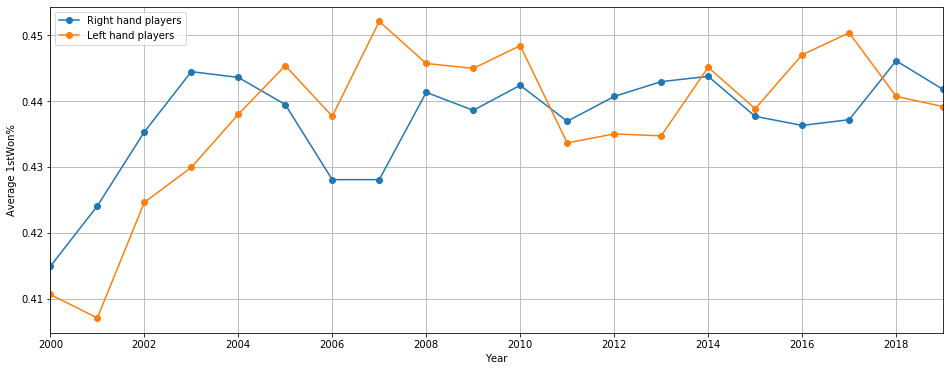

In [21]:
mean_df_r = df[df.player_hand=='R'].sv1stWon_pct.mean()
mean_df_l = df[df.player_hand=='L'].sv1stWon_pct.mean()

print('The mean serve 1st Won% of righties is ' + str(mean_df_r))
print('The mean serve 1st Won% of lefties is ' + str(mean_df_l))

plt.figure(figsize=(16,6))

#sv1stWon_plot=df.groupby('year').sv1stWon_pct.mean().plot(kind='line', grid=True, label='players 1sfIn%')
sv1stWon_plot=df[df.player_hand=='R'].groupby('year').sv1stWon_pct.mean().plot(kind='line', 
                                                        grid=True, label='Right hand players',marker='o')
sv1stWon_plot=df[df.player_hand=='L'].groupby('year').sv1stWon_pct.mean().plot(kind='line', 
                                                        grid=True, label='Left hand players',marker='o')
plt.xticks(range(2000, 2020,2))
plt.xlabel('Year')
plt.ylabel('Average 1stWon%')
h1, l1 = sv1stWon_plot.get_legend_handles_labels()
plt.legend(h1, l1, loc=2)
plt.show()

### Righties also have higher second serve in percentage than lefities

The mean serve 2nd In% of righties is 0.3943592290880176
The mean serve 2nd In% of lefties is 0.383077687264055


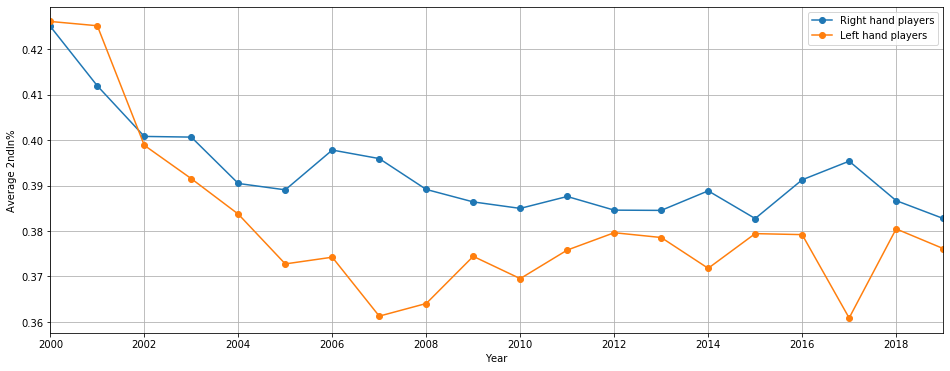

In [22]:
mean_df_r = df[df.player_hand=='R'].sv2ndIn_pct.mean()
mean_df_l = df[df.player_hand=='L'].sv2ndIn_pct.mean()

print('The mean serve 2nd In% of righties is ' + str(mean_df_r))
print('The mean serve 2nd In% of lefties is ' + str(mean_df_l))

plt.figure(figsize=(16,6))

#sv2ndIn_plot=df.groupby('year').sv2ndIn_pct.mean().plot(kind='line', grid=True, label='All players')
sv2ndIn_plot=df[df.player_hand=='R'].groupby('year').sv2ndIn_pct.mean().plot(kind='line', 
                                                    grid=True, label='Right hand players',marker='o')
sv2ndIn_plot=df[df.player_hand=='L'].groupby('year').sv2ndIn_pct.mean().plot(kind='line', 
                                                    grid=True, label='Left hand players',marker='o')
plt.xticks(range(2000, 2020,2))
plt.xlabel('Year')
plt.ylabel('Average 2ndIn%')
h1, l1 = sv2ndIn_plot.get_legend_handles_labels()
plt.legend(h1, l1, loc=1)
plt.show()

### Also the average second serve won percentage of righties through years are higher than lefties 

The mean serve 2nd Won% of righties is 0.20377011722632207
The mean serve 2nd Won% of lefties is 0.19503973773099076


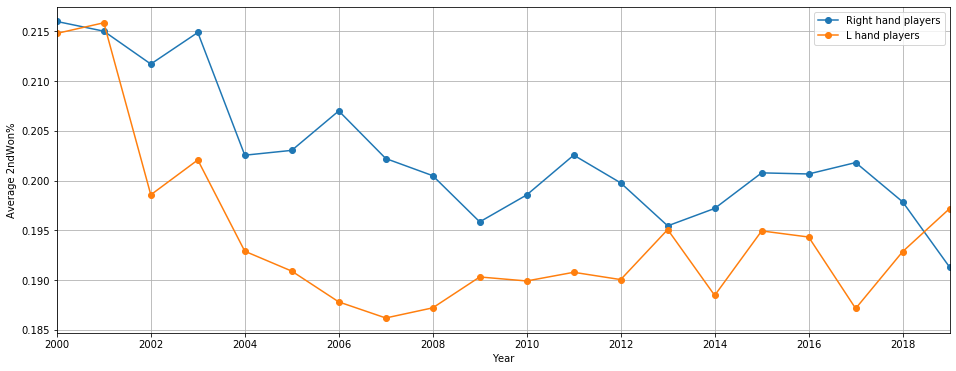

In [23]:
mean_df_r = df[df.player_hand=='R'].sv2ndWon_pct.mean()
mean_df_l = df[df.player_hand=='L'].sv2ndWon_pct.mean()

print('The mean serve 2nd Won% of righties is ' + str(mean_df_r))
print('The mean serve 2nd Won% of lefties is ' + str(mean_df_l))

plt.figure(figsize=(16,6))

#sv2ndWon_plot=df.groupby('year').sv2ndWon_pct.mean().plot(kind='line', grid=True, label='All players')
sv2ndWon_plot=df[df.player_hand=='R'].groupby('year').sv2ndWon_pct.mean().plot(kind='line', 
                                                grid=True, label='Right hand players',marker='o')
sv2ndWon_plot=df[df.player_hand=='L'].groupby('year').sv2ndWon_pct.mean().plot(kind='line', 
                                                grid=True, label='L hand players',marker='o')
plt.xticks(range(2000, 2020,2))
plt.xlabel('Year')
plt.ylabel('Average 2ndWon%')
h1, l1 = sv2ndWon_plot.get_legend_handles_labels()
plt.legend(h1, l1, loc=1)
plt.show()

### The average break points lefties faced are higher than righties.  

The mean break points loss of righties is 2.5979535068547586
The mean break points loss of lefties is 2.722531293463143


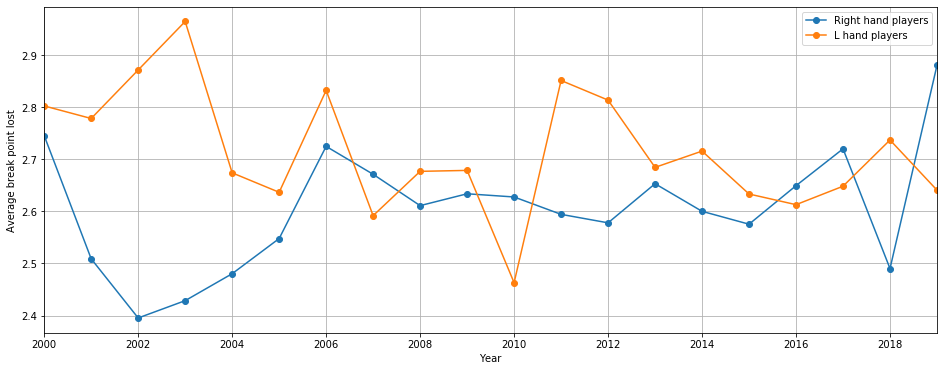

In [24]:
mean_df_r = df[df.player_hand=='R'].bpLoss.mean()
mean_df_l = df[df.player_hand=='L'].bpLoss.mean()

print('The mean break points loss of righties is ' + str(mean_df_r))
print('The mean break points loss of lefties is ' + str(mean_df_l))

plt.figure(figsize=(16,6))

sv2ndWon_plot=df[df.player_hand=='R'].groupby('year').bpLoss.mean().plot(kind='line', 
                                                grid=True, label='Right hand players',marker='o')
sv2ndWon_plot=df[df.player_hand=='L'].groupby('year').bpLoss.mean().plot(kind='line', 
                                                grid=True, label='L hand players',marker='o')
plt.xticks(range(2000, 2020,2))
plt.xlabel('Year')
plt.ylabel('Average break point lost')
h1, l1 = sv2ndWon_plot.get_legend_handles_labels()
plt.legend(h1, l1, loc=1)
plt.show()

### Righties won more matches than lefities 

In [25]:
sum_won_r = df[df.player_hand=='R'].won_flag.sum()
sum_won_l = df[df.player_hand=='L'].won_flag.sum()

print('Total matches won by righties = ' + str(sum_won_r))
print('Total matches won by lefties = ' + str(sum_won_l))

Total matches won by righties = 5261
Total matches won by lefties = 4805
